# Active Subspace Analysis Notebook for SNL CLM

**DESCRIPTION**

This data set comes from an ensemble of Community Land Model (CLM) simulations performed by Khachik Sargsyan at Sandia National Labs. The input variables are 68 parameters from the CLM. The output is the Leaf Area Index (LAI) predicted by the CLM.

**INPUTS (68)**

All 68 input variables are normalized to the interval [-1,1] and are assumed to have a uniform density.

**OUTPUTS (1)**

The output is the Leaf Area Index from the CLM, which is a predicted bulk property.

**REFERENCES**

+ Sargsyan, Safta, Najm, Debusschere, Ricciuto, and Thornton. [Dimensionality Reduction for Complex Models via Bayesian Compressive Sensing](http://www.dl.begellhouse.com/journals/52034eb04b657aea,67004a5b6ddaf807,3388f20965b7cc22.html)
+ Constantine, Dow, and Wang. [Active Subspace Methods in Theory and Practice: Applications to Kriging Surfaces](http://epubs.siam.org/doi/abs/10.1137/130916138)

**CONTACT**

Questions or comments? Contact [Paul Constantine](mailto:pconstan@mines.edu)


In [1]:
import numpy as np
import pandas as pn
import active_subspaces as ac
%matplotlib inline

Import the data set, distinguish inputs (X) and outputs (F), and set the labels. The inputs are all normalized to the interval [-1,1].

In [2]:
df = pn.DataFrame.from_csv('SNL-CLM.txt')
data = df.as_matrix()
X = data[:,:68]
f = data[:,68]
M,m = X.shape
labels = df.keys()
in_labels = labels[:68]
out_label = labels[68]

Run the check with the linear model.

In [3]:
ss = ac.subspaces.Subspaces()
ss.compute(f=f[:,np.newaxis],X=X,sstype='OLS',nboot=200)

Display the one-dimensional sufficient summary plot. The weights are the normalized gradient of the linear model, and they are used to derive the active variable---which is a linear combination of the inputs. 

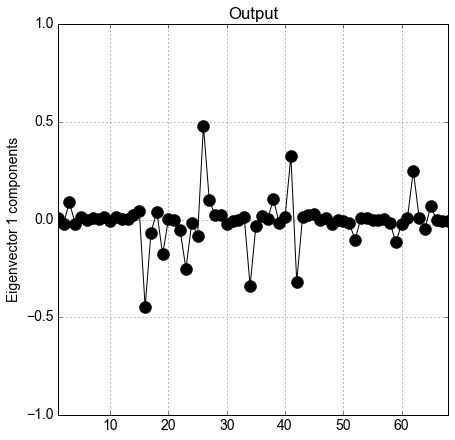

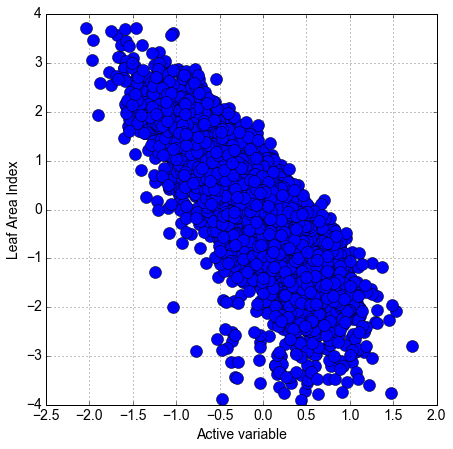

In [4]:
ss.partition(1)
y = np.dot(X,ss.W1) # active variables
ac.utils.plotters.eigenvectors(ss.W1)
ac.utils.plotters.sufficient_summary(y,f,out_label=out_label)

Approximate gradients with local linear regressions to approximate the active subspace.

In [5]:
G = ac.gradients.local_linear_gradients(X,f)
ass = ac.subspaces.Subspaces()
ass.compute(df=G,nboot=200)

Plot the active subspace.

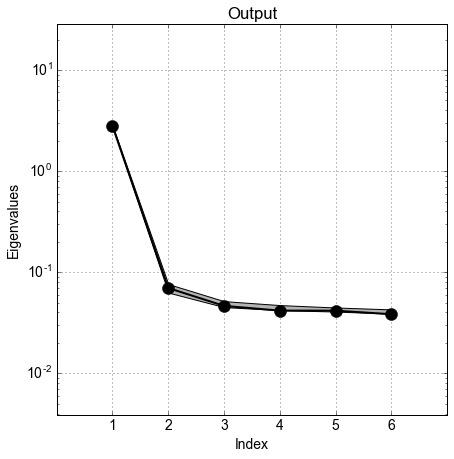

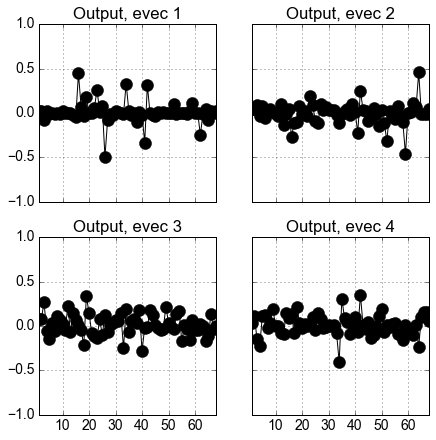

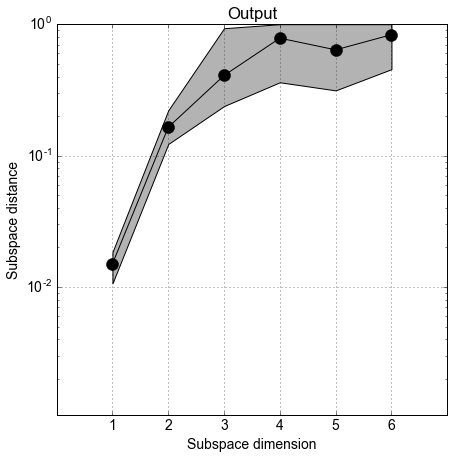

In [6]:
k = 6
ac.utils.plotters.eigenvalues(ass.eigenvals[:k],ass.e_br[:k,:])
ac.utils.plotters.eigenvectors(np.hstack((ass.W1,ass.W2)))
ac.utils.plotters.subspace_errors(ass.sub_br[:k,:])

Sufficient summary plots. 

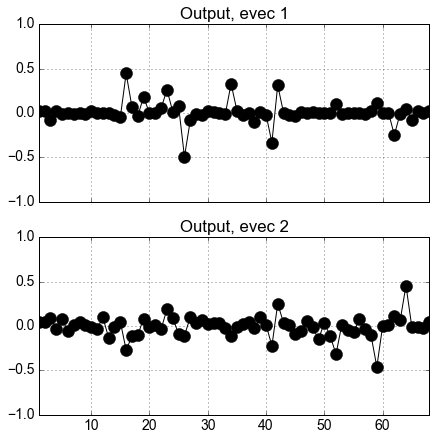

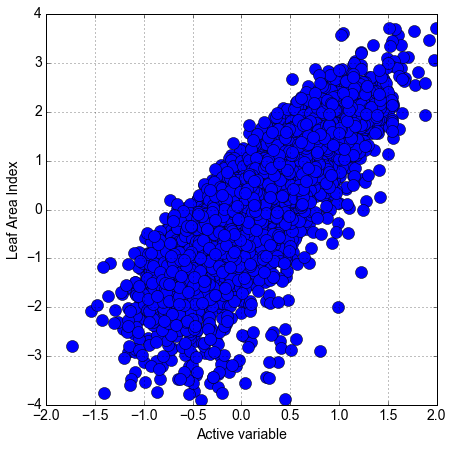

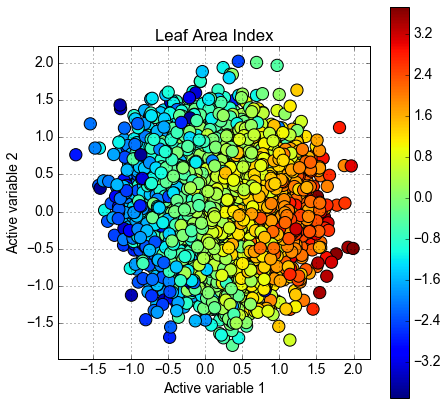

In [7]:
ass.partition(2)
y = np.dot(X,ass.W1) # active variables
ac.utils.plotters.eigenvectors(ass.W1)
ac.utils.plotters.sufficient_summary(y,f,out_label=out_label)